# Gini Index(경제적 관점)
![image](https://upload.wikimedia.org/wikipedia/commons/thumb/5/59/Economics_Gini_coefficient2.svg/1024px-Economics_Gini_coefficient2.svg.png)

- Lorenz Curve : 모든 경제 인구를 소득순으로 정렬한 후에, 그들의 누적 소득의 합을 그린 그래프
- 이상적으로 균등하게 배분되었다면, 45도의 그려질 것
- 부의 불균형으로 로렌츠 곡선이 생기게 된다
- Gini Index는 45도 직선과 로렌츠 곡선 사이의 면적을 삼각형 전체의 면적으로 나눈 값
- 부의 불균형이 높을수록 값이 커진다

# Gini_Index(not 경제적 관점)

In [65]:
predictions = [0.9,0.3,0.8,0.75,0.65,0.6,0.78,0.7,0.05,0.4,0.4,0.05,0.5,0.1,0.1]
actual = [1,1,1,1,1,1,0,0,0,0,0,0,0,0,0]

In [2]:
import numpy as np

In [9]:
all = np.c_[actual, predictions,np.arange(len(actual))] #신기방기 새로운 표현 익힘
all

array([[ 1.  ,  0.9 ,  0.  ],
       [ 1.  ,  0.3 ,  1.  ],
       [ 1.  ,  0.8 ,  2.  ],
       [ 1.  ,  0.75,  3.  ],
       [ 1.  ,  0.65,  4.  ],
       [ 1.  ,  0.6 ,  5.  ],
       [ 0.  ,  0.78,  6.  ],
       [ 0.  ,  0.7 ,  7.  ],
       [ 0.  ,  0.05,  8.  ],
       [ 0.  ,  0.4 ,  9.  ],
       [ 0.  ,  0.4 , 10.  ],
       [ 0.  ,  0.05, 11.  ],
       [ 0.  ,  0.5 , 12.  ],
       [ 0.  ,  0.1 , 13.  ],
       [ 0.  ,  0.1 , 14.  ]])

In [10]:
np.lexsort((all[:,2] , -1 * all[:,1]))

array([ 0,  2,  6,  3,  7,  4,  5, 12,  9, 10,  1, 13, 14,  8, 11],
      dtype=int64)

In [12]:
all[:,0].cumsum().sum()

75.0

In [16]:
def gini(actual, pred) :
    assert (len(actual) == len(pred))
    
    all = np.asarray(np.c_[actual, predictions, np.arange(len(actual))], dtype = np.float)
    all = all[np.lexsort((all[:,2], -1 * all[:,1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
    giniSum -= (len(actual) +1)/2
    
    return giniSum / len(actual)

def gini_normalized(actual, pred) :
    return gini(actual, pred) / gini(actual, actual)

In [29]:
gini_pred = gini(actual, predictions)
gini_max = gini(actual, actual)
ngini = gini_normalized(actual, predictions)

print('Gini : %.3f Max Gini : %.3f, Normalized Gnin : %.3f' % (gini_pred, gini_max, ngini))

Gini : 0.189 Max Gini : 0.189, Normalized Gnin : 1.000


In [32]:
data = zip(actual, predictions)
sorted_data = sorted(data, key = lambda d : d[1]) #prediction 기준으로 sorting
sorted_actual = [d[0] for d in sorted_data]
print('Sorted Actual Values \n', sorted_data)

Sorted Actual Values 
 [(0, 0.05), (0, 0.05), (0, 0.1), (0, 0.1), (1, 0.3), (0, 0.4), (0, 0.4), (0, 0.5), (1, 0.6), (1, 0.65), (0, 0.7), (1, 0.75), (0, 0.78), (1, 0.8), (1, 0.9)]


In [38]:
import matplotlib.pyplot as plt

In [41]:
sorted_actual_cum = np.cumsum(sorted_actual)
sorted_actual_cum

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 3, 3, 4, 4, 5, 6], dtype=int32)

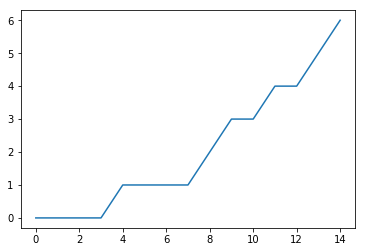

In [42]:
#로렌츠 곡선
plt.plot(sorted_actual_cum)

[]

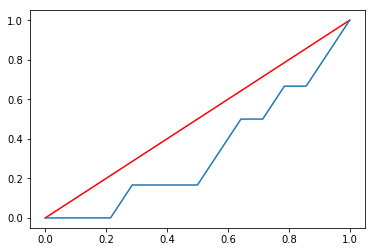

In [55]:
#정규화된 로렌츠 곡선
plt.plot([0,1], c = 'r')
plt.plot(np.linspace(0,1,num = len(sorted_actual)) ,sorted_actual_cum / 6)
plt.plot()

gini index는 빨간 선과 파란 선 사이의 면적! - 0.189

[]

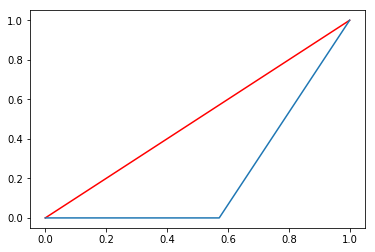

In [67]:
#모든 정답을 다 맞췄을 떄의 모습
plt.plot([0,1], c = 'r')
plt.plot(np.linspace(0,1,num = len(sorted_actual)) ,np.sort(actual).cumsum() / 6)
plt.plot()

면적은 0.3

In [68]:
#정규화된 지니 계수 값
0.189 / 0.3

0.63

- 예측값들의 상대적 순서를 기준으로 점수를 계산
- 확률값이 크기 혹은 예측값들 간의 상대적 점수 격차는 고려되지 안흔다.
- 1에 가까울수록 성능이 좋음!